In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr

In [18]:
plt.style.use('bmh')

In [2]:
# load Rrs - IOP dataset
ds = xr.load_dataset('./data/psc_rrs_iop.nc')
# load inversion results
ds_inv = xr.load_dataset('./data/psc_rrs_inversion.nc')

In [3]:
ds_inv['iop'] = ['a', 'bb']

In [216]:
# select spectra
no = 92

In [250]:
def plot_spectral_fit(xy, ncol=2, **kwargs):
    nrow = int(np.ceil(len(xy)/ncol))
    fig, axs = plt.subplots(nrow, ncol, figsize=kwargs.get('figsize'))
    axs = axs.flat
    # font
    font = {'fontname': kwargs.get('font')}
    
    for i in xy:
        y1 = i.get('y1').values
        y2 = i.get('y2').values
        x = i.get('y1')[i.get('y1').dims[0]].values
        # get next axes
        ax = next(axs)
        
        ax.plot(x, y1, marker='o', markersize=6, linestyle='--', markeredgecolor='black', label='forward modelled')
        ax.plot(x, y2, marker='o', markersize=6, linestyle='--', markeredgecolor='black', label='inverse modelled')
        # title and labels
        ax.set_title(i.get('name'), **font)
        ax.set_ylabel('{}'.format(i.get('units')), **font)
        ax.set_xlabel('wavelength (nm)')
        ax.legend()
        
        fig.tight_layout()

In [251]:
#Rrs
rrs = {
    'y1': ds.rrs.isel(no=no),
    'y2': ds_inv.rrs.isel(no=no),
    'units': '$R_{rs}$ ($sr^{-1}$)',
    'name': '$R_{rs}$'
}


# pico
a_pico = {
    'y1': ds.iops.sel(comp='pico', iop='a').isel(no=no),
    'y2': ds_inv.iops.sel(comp='pico', iop='a').isel(no=no),
    'units': 'absorption ($m^{-1}$)',
    'name': 'pico'
}

# nano
a_nano = {
    'y1': ds.iops.sel(comp='nano', iop='a').isel(no=no),
    'y2': ds_inv.iops.sel(comp='nano', iop='a').isel(no=no),
    'units': 'absorption ($m^{-1}$)',
    'name': 'nano'
}

# pico
a_micro = {
    'y1': ds.iops.sel(comp='micro', iop='a').isel(no=no),
    'y2': ds_inv.iops.sel(comp='micro', iop='a').isel(no=no),
    'units': 'absorption ($m^{-1}$)',
    'name': 'micro'
}

# total absorption
a_total = {
    'y1': ds.iops.sel(iop='a').isel(no=no).sum(axis=0),
    'y2': ds_inv.iops.sel(iop='a').isel(no=no).sum(axis=0),
    'units': 'absorption ($m^{-1}$)',
    'name': 'total absorption'
}

# total bb
bb_total = {
    'y1': ds.iops.sel(iop='bb').isel(no=no).sum(axis=0),
    'y2': ds_inv.iops.sel(iop='bb').isel(no=no).sum(axis=0),
    'units': 'backscatter ($m^{-1}$)',
    'name': 'total backscatter'
}

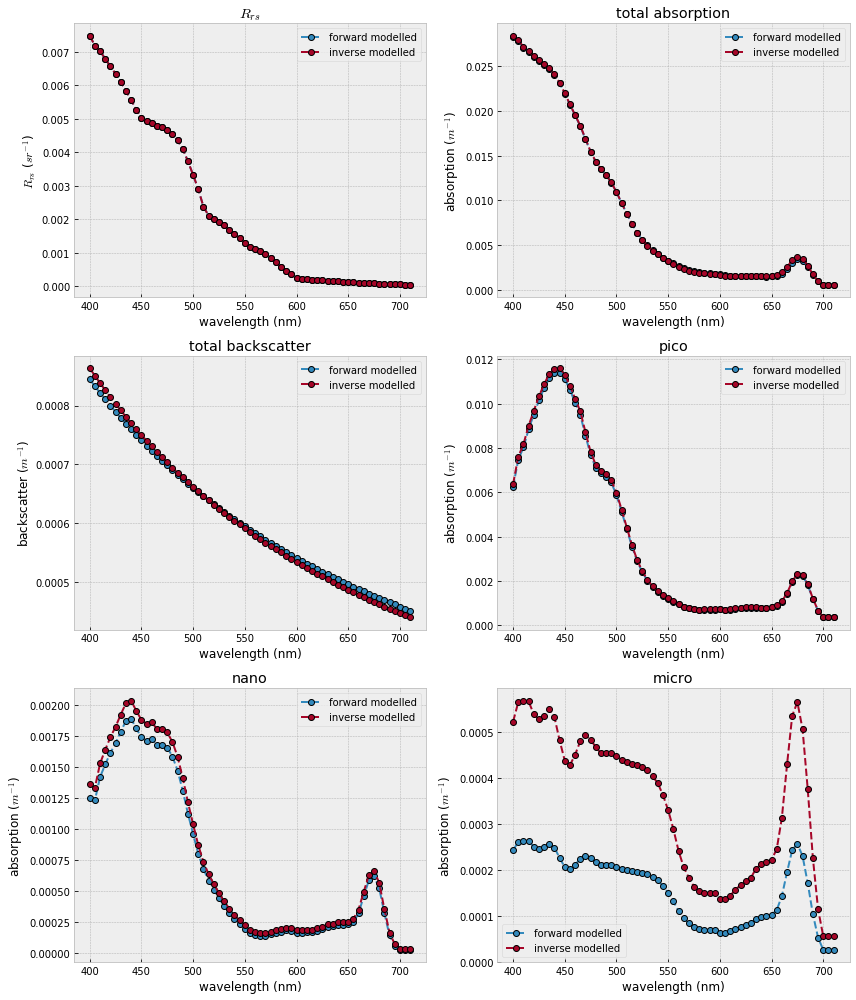

In [252]:
plot_spectral_fit([rrs, a_total, bb_total, a_pico, a_nano, a_micro], figsize=(12,14))